# Adapted from https://github.com/dlab-berkeley/DH-Text-Analysis


## Text Analysis for Digital Humanities: Introduction

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Understand preprocessing and tokenization as preparatory steps in text analysis.
* Use the NLTK library to analyze the characteristic speech patterns of narrators in a play.
* Use TF-IDF to explore which plays are the most similar to each other.
* Use the Gensim library to explore prevalent topics or motifs in a play across narrative time.
* Use the Spacy library to do Named Entity Recognition, exploring how often certain times of day, places, or people are mentioned in a play.

</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br> 

### Sections
1. [Introduction to Text Analysis](#intro)
2. [Tokenizing Text](#token)
3. [NLTK - Natural Language Toolkit](#nltk)
4. [Comparative Stylometry Using TF-IDF with Scikit-Learn](#tfidf)
5. [Named Entity Recognition With SpaCy](#ner)
6. [Topic Modeling With Gensim](#topic)

<a id='intro'></a>
# Introduction to Text Analysis

Text analysis techniques lie in the domain of Natural Language Processing, where we apply computational techniques to human languages in order to explain underlying structures.

Performing computational methods on natural language is a question of representations. Language is understandable to humans because it is a system of communication tailored to our cognitive abilities, enabling us to encode and decode complex information through shared symbols and rules.

However, most machine learning and data science techniques utilize numerical methods to extract patterns from large datasets. This means we need to find a way to convert the language into a numerical representation. 

In this notebook, we will cover a variety of steps to "preprocess" and create numerical representations of text in order to do computational work.

<a id='token'></a>
# Tokenizing Text

Tokenization involves breaking down text into smaller units, such as words or phrases, to facilitate further analysis or processing in natural language tasks.

Recall a string in Python looks like this:

In [1]:
text = "I'm not superstitious. I have read a heap of books in my time. I am a scholar in my own way"

We can use the `.split()` method on a string to split it on a particular text character. By default, this is a whitespace, but `.split()` can also take other characters like a period (`.`).

Let's first split our string up in sentences.

In [2]:
sents = text.split('.')
sents

["I'm not superstitious",
 ' I have read a heap of books in my time',
 ' I am a scholar in my own way']

Note that the output of `.split()` is a list.

Now, let's split those sentences up into individual words. This means we have to apply `.split()` again to **each item in our list**. 

🔔 **Question**: Conceptually, can you explain how this loop comes to its output?

In [3]:
tokens = []
for sent in sents:
    tokens.append(sent.split())

tokens

[["I'm", 'not', 'superstitious'],
 ['I', 'have', 'read', 'a', 'heap', 'of', 'books', 'in', 'my', 'time'],
 ['I', 'am', 'a', 'scholar', 'in', 'my', 'own', 'way']]

Because we are splitting up the items in our `sents` list further, we now have a **list of lists**. You can tell by the double `[[` and `]]` brackets at the start and end of `tokens`. 

By the way, we can access a token from this list of lists using double indexing:

In [4]:
tokens[1][1]

'have'

<a id='nltk'></a>
# NLTK - Natural Language Toolkit

It is useful to know how splitting up words using `.split()` works--but in practice, we do not work like this. Python has access to many Natural Language Processing (NLP) packages that have built-in tokenization methods that are more sophisticated, and easier to use.

Let's have a look at NLTK--the Natural Language Toolkit--which is a often-used package in the aacademic community for NLP work. First, we have to install it, as well as some dependencies.

In [5]:
# %pip install nltk
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mervetekgurler/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mervetekgurler/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mervetekgurler/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mervetekgurler/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Now, we can use the `.sent_tokenize()` method in NLTK to easily tokenize sentences:

In [6]:
nltk.sent_tokenize(text)

["I'm not superstitious.",
 'I have read a heap of books in my time.',
 'I am a scholar in my own way']

Or we can use `.word_tokenize()` to tokenize words.

In [7]:
nltk.word_tokenize(text)

['I',
 "'m",
 'not',
 'superstitious',
 '.',
 'I',
 'have',
 'read',
 'a',
 'heap',
 'of',
 'books',
 'in',
 'my',
 'time',
 '.',
 'I',
 'am',
 'a',
 'scholar',
 'in',
 'my',
 'own',
 'way']

Notice what happens there with "I'm"? What if our sentence contains a contraction? 

In [8]:
nltk.word_tokenize("I can't believe this!")

['I', 'ca', "n't", 'believe', 'this', '!']

🔔 **Question**: Why do you think NLTK is splitting up "ca" and "n't"?

It is because for `word_tokenize()` contractions are considered two words. You can read more [here](https://github.com/nltk/nltk/issues/401) and [here](https://stackoverflow.com/questions/34714162/preventing-splitting-at-apostrophies-when-tokenizing-words-using-nltk)

If you wanted to keep can't or I'm as one word, you can use another nltk method called [TweetTokenizer](https://www.nltk.org/api/nltk.tokenize.casual.html#nltk.tokenize.casual.TweetTokenizer)

In [9]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
tknzr.tokenize("I can't believe this!")

['I', "can't", 'believe', 'this', '!']

## Stems and Stemming

Stemming is a text preprocessing technique that reduces words to their root form by removing prefixes and suffixes, often resulting in a basic, but sometimes grammatically incorrect, word form.

To stem a word, we first have to **instantiate**, or make a fresh copy of, our stemmer object: 

In [10]:
stemmer = nltk.stem.LancasterStemmer()

Now let's test it on three different forms of the same stem: 

In [11]:
for word in ["believe", "belief", "believing"]:
    print(stemmer.stem(word))

believ
believ
believ


In [12]:
stemmer.stem("believe")

'believ'

## Lemmas and Lemmatizers

A lemma is the "dictionary form" of a word, so the lemma for "jumps" is "jump." Lemmatizing often doesn't transform the text as much as stemming. First, instantiate the lemmatizer: 

In [13]:
lemmatizer = nltk.stem.WordNetLemmatizer()

In [14]:
lemmatizer.lemmatize("believe")

'believe'

In [15]:
for word in ["believe", "belief", "believing"]:
    print(lemmatizer.lemmatize(word))

believe
belief
believing


In [16]:
for word in ["happy", "happier", "happiest"]:
    print(lemmatizer.lemmatize(word))

happy
happier
happiest


In [17]:
for word in ["jumps", "jumping", "jump"]:
    print(lemmatizer.lemmatize(word))

jump
jumping
jump


In [18]:
# Let's get POS tags for these examples
nltk.download('averaged_perceptron_tagger')
print(nltk.pos_tag(["jumps", "jumping", "jump"]))


[('jumps', 'NNS'), ('jumping', 'VBG'), ('jump', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mervetekgurler/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


`[('jumps', 'NNS'), ('jumping', 'VBG'), ('jump', 'NN')]`

VBG is a tag used for gerund, which is a verb from ending in -ing that functions as a noun in a sentence, like "Jumping is fun"

If the same word was used as a verb, we would end up lemmatizing it differently.

In [19]:
print(lemmatizer.lemmatize("jumping", pos="v")) # here we specify the part of speech as verb

jump


In [20]:
tokens

[["I'm", 'not', 'superstitious'],
 ['I', 'have', 'read', 'a', 'heap', 'of', 'books', 'in', 'my', 'time'],
 ['I', 'am', 'a', 'scholar', 'in', 'my', 'own', 'way']]

In [21]:
for sentence in tokens:
    for token in sentence:
        print(lemmatizer.lemmatize(token))

I'm
not
superstitious
I
have
read
a
heap
of
book
in
my
time
I
am
a
scholar
in
my
own
way


## Things To Do With NLTK Text Objects

The NLTK Text object provides a convenient interface for exploring and analyzing a text.

Essentially, you feed it a text file (which takes the form of a string in Python), and it processes this text so that you can call a bunch of methods on that new object. It allows you to do things like concordancing, look for similar words to an input word, and show dispersion plots for given words. 

Let's have a look:

In [22]:
file_path = '../Data/1895_wilde-oscar_the-importance-of-being-earnest.txt'

with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

In [23]:
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Assuming 'text' is your corpus as a single string
# Tokenize the corpus
tokens = word_tokenize(text)
# Create an NLTK Text object
nltk_text = Text(tokens)

# Example operations:
# 1. Concordance
print("Concordance for the word 'brother':")
nltk_text.concordance('brother')

Concordance for the word 'brother':
Displaying 25 of 51 matches:
 always pretended to have a younger brother of the name of Ernest , who lives i
have invented a very useful younger brother called Ernest , in order that you m
 accepts me , I am going to kill my brother , indeed I think I 'll kill him in 
en propose for practice . I know my brother Gerald does . All my girl-friends t
nsense . Algernon : What about your brother ? What about the profligate Ernest 
! Jack : Very well , then . My poor brother Ernest was carried off suddenly , i
le too much interested in your poor brother Ernest ? Wo n't she feel his loss a
ts , that unfortunate young man his brother seems to be . But I must not distur
4 , The Albany , W. ' Uncle Jack 's brother ! Did you tell him Mr. Worthing was
 from your card , are Uncle Jack 's brother , my cousin Ernest , my wicked cous
 some terrible calamity ? Jack : My brother . Miss Prism : More shameful debts 
ack : [ -- ] Dead ! Chasuble : Your brother Ernest dead

https://tedboy.github.io/nlps/generated/generated/nltk.Text.similar.html
Distributional similarity: find other words which appear in the same contexts as the specified word; list most similar words first.

In [24]:
# 2. Similar words
print("\nWords similar to 'brother':")
nltk_text.similar('brother')


Words similar to 'brother':
name case man moment room music for but two way little pleasure county
aunt well being doubt matter place hard


https://tedboy.github.io/nlps/generated/generated/nltk.Text.collocations.html?highlight=collocations#nltk.Text.collocations

The `collocations()` method in NLTK finds and displays the most frequent and statistically significant pairs of words (bigrams) that appear together in your text. These word pairs often occur together more often than would be expected by chance, revealing common phrases or expressions in the text.

In [25]:
# 3. Collocations
print("\nCollocations in the text:")
nltk_text.collocations()


Collocations in the text:
Lady Bracknell; Miss Prism; Mr. Worthing; Aunt Augusta; Miss Fairfax;
Miss Cardew; Uncle Jack; cigarette case; Dr. Chasuble; dear fellow;
Good heavens; LADY BRACKNELL; n't think; severe chill; cucumber
sandwiches; MISS PRISM; Lord Bracknell; need hardly; Mr. Bunbury;
three months


https://tedboy.github.io/nlps/generated/generated/nltk.Text.dispersion_plot.html?highlight=dispersion#nltk.Text.dispersion_plot 

A dispersion plot in NLTK shows where specific words appear throughout a text. Each word you specify is represented by a row, and each occurrence is marked along the horizontal axis, which represents the progression of the text from start to finish. This helps you visualize patterns, such as when and how often certain characters or themes are mentioned across the narrative.


In [26]:
len(nltk_text)

23706


Dispersion plot for words 'brother', 'Gerald', and 'Ernest':


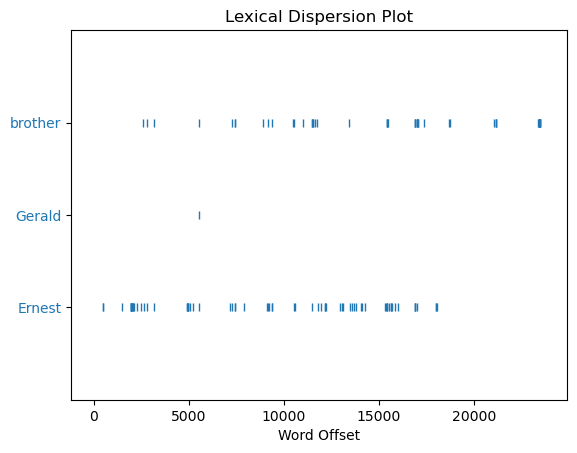

In [27]:
# 4. Dispersion Plot
print("\nDispersion plot for words 'brother', 'Gerald', and 'Ernest':")
nltk_text.dispersion_plot(['brother', 'Gerald', 'Ernest'])

<a id='tfidf'></a>

# Comparative stylometry using TF-IDF with Scikit-Learn

## Counting Words

A useful thing to know is how often a word shows up in a corpus. We can use the `CountVectorizer` object from the `Scikit-Learn` package for this.

Let's read in some plays using a custom function:

In [28]:
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

boucicault_grimaldi = read_file('../Data/1853_boucicault-dion_grimaldi.txt')
boucicault_phantom = read_file('../Data/1856_boucicault-dion_the-phantom.txt')
yeats = read_file('../Data/1919_yeats-wb_the-only-jealousy-of-emer.txt')
wilde = read_file('../Data/1895_wilde-oscar_the-importance-of-being-earnest.txt')
shaw = read_file('../Data/1895_shaw-george-bernard_you-never-can-tell.txt')

First, we instantiate our CountVectorizer() object. Then, we read in our collection of plays using the `fit_transform` method. It does 2 things:

1. Counts all terms in the total vocabulary of our corpus.
2. Creates a matrix of term counts for each document in the corpus.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the documents
count_matrix = count_vectorizer.fit_transform([boucicault_grimaldi, boucicault_phantom, yeats, wilde, shaw])

The `count_vectorizer` object now knows how often each word in the total vocabulary of our corpus occurs. We can get this information using the `.vocabulary_` attribute:

In [30]:
count_vectorizer.vocabulary_

{'act': 77,
 'scene': 5559,
 'handsomely': 2946,
 'furnished': 2695,
 'saloon': 5518,
 'in': 3282,
 'hotel': 3144,
 'at': 435,
 'nottingham': 4333,
 'julia': 3568,
 'apartment': 307,
 'window': 7091,
 'with': 7112,
 'balcony': 516,
 'centre': 1016,
 'doors': 1937,
 'door': 1936,
 'an': 269,
 'elegant': 2089,
 'deshabille': 1745,
 'is': 3491,
 'discovered': 1841,
 'table': 6332,
 'writing': 7178,
 'music': 4204,
 'repeating': 5302,
 'as': 396,
 'she': 5729,
 'writes': 7177,
 'my': 4211,
 'dear': 1634,
 'sharp': 5722,
 'am': 245,
 'now': 4339,
 'playing': 4733,
 'success': 6207,
 'has': 2973,
 'been': 590,
 'unprecedented': 6765,
 'prisoner': 4918,
 'here': 3049,
 'for': 2589,
 'another': 290,
 'week': 7017,
 'so': 5903,
 'cannot': 941,
 'appear': 324,
 'drury': 2003,
 'lane': 3654,
 'theatre': 6417,
 'until': 6784,
 'next': 4277,
 'month': 4133,
 'knocks': 3616,
 'come': 1240,
 'enter': 2176,
 'waiter': 6940,
 'salver': 5521,
 'on': 4423,
 'which': 7044,
 'are': 357,
 'three': 6460,
 'c

Let's now have a look at the matrix of counts that we generated. We'll put them in a Pandas Dataframe for readability:

In [31]:
import pandas as pd

pd.DataFrame(count_matrix.todense(), columns=count_vectorizer.get_feature_names_out())

,10,104,12,149,14th,1645,1750,1860,1896,1what,...,yours,yourself,yourselves,youth,yrs,ze,zem,zj,ça,émotion
0,1,0,0,0,0,0,0,0,0,1,...,9,9,2,0,1,1,2,1,2,1
1,0,0,0,0,0,1,1,0,0,0,...,3,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
3,0,1,0,2,2,0,0,0,0,0,...,4,2,0,0,0,0,0,0,0,0
4,0,0,2,0,0,0,0,1,1,0,...,10,16,0,4,0,0,0,0,0,0


🔔 **Question**: Can you explain what this matrix is representing?

## TF-IDF

A more informative metric might be how often a term appears in one text, **as opposed to in other texts**.

**TF-IDF**: Term frequency, adjusted for inverse document frequency. 
 - Term frequency: the frequency with which words occur in your text
 - Inverse document frequency: the frequency with which words occur in your corpus. 

Or, a fancy way of getting distinguishing words of a document. 

Let's try it. We'll use Scikit-Learn's `TfidfVectorizer` object this time. Note that we set `max_features` to 800, meaning we only will take the top-800 words from our vocabulary based on how often they appear.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=800)

In [33]:
tfidf_matrix = tfidf.fit_transform([boucicault_grimaldi, boucicault_phantom, yeats, wilde, shaw])

Now let's turn this matrix into a DataFrame as well. We'll add index labels for the different texts we're comparing for clarity.

In [34]:
df = pd.DataFrame(tfidf_matrix.todense(), columns=tfidf.get_feature_names_out(),
             index=['Boucicault_Grimaldi', 'Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'])
df

,able,about,absurd,accept,across,act,ada,afraid,after,afternoon,...,years,yes,yet,yonder,you,young,younger,your,yours,yourself
Boucicault_Grimaldi,0.002225,0.007915,0.001340,0.003743,0.001872,0.020589,0.000000,0.002808,0.003166,0.000000,...,0.004749,0.029947,0.006332,0.000000,0.332443,0.009498,0.000000,0.112397,0.008423,0.007124
Boucicault_Phantom,0.000000,0.004536,0.000000,0.001341,0.001341,0.006704,0.166585,0.000000,0.011340,0.000000,...,0.009072,0.022792,0.006804,0.035697,0.209786,0.007938,0.003188,0.063503,0.004022,0.001134
Yeats,0.000000,0.011357,0.000000,0.000000,0.000000,0.000000,0.000000,0.013427,0.011357,0.000000,...,0.002839,0.000000,0.014196,0.000000,0.187386,0.008518,0.000000,0.102211,0.000000,0.002839
Wilde,0.005555,0.035007,0.010516,0.000668,0.002670,0.004005,0.000000,0.010014,0.015245,0.015296,...,0.006776,0.040055,0.002823,0.000000,0.287963,0.010163,0.003968,0.071144,0.002670,0.001129
Shaw,0.002631,0.018407,0.000000,0.001844,0.002582,0.004058,0.000000,0.005533,0.011856,0.003169,...,0.004992,0.038363,0.006240,0.000000,0.290461,0.023399,0.002631,0.062086,0.003689,0.004992


In [35]:
# Number of top terms you want to extract
top_n = 10

# Find the most distinctive words for each document
for doc in df.index:
    # Sort the terms for the current document in descending order of their TF-IDF scores
    sorted_terms = df.loc[doc].sort_values(ascending=False)
    # Extract the top N terms along with their scores
    top_terms = sorted_terms.head(top_n)
    print(f"Most distinctive words for {doc}:")
    print(top_terms, "\n")

Most distinctive words for Boucicault_Grimaldi:
violet    0.383718
the       0.339566
you       0.332443
to        0.291283
and       0.231918
grim      0.174223
of        0.168596
my        0.165430
is        0.158306
mal       0.154484
Name: Boucicault_Grimaldi, dtype: float64 

Most distinctive words for Boucicault_Phantom:
the      0.510291
and      0.254012
to       0.227930
davy     0.218940
you      0.209786
of       0.205250
alan     0.180864
edgar    0.178484
is       0.171231
ada      0.166585
Name: Boucicault_Phantom, dtype: float64 

Most distinctive words for Yeats:
the          0.494018
and          0.349220
of           0.292436
cuchulain    0.286001
emer         0.220459
that         0.207261
you          0.187386
sidhe        0.148959
to           0.147638
he           0.147638
Name: Yeats, dtype: float64 

Most distinctive words for Wilde:
jack         0.323491
to           0.313372
the          0.312807
algernon     0.303347
you          0.287963
cecily       0.26305

Note that a lot of these words are stopwords! We might want to filter them out. Let's run the `TfidfVectorizer` again, but this time using the `stop_words` attribute to filter out stopwords while we process the corpus.

In [36]:
tfidf_stop = TfidfVectorizer(max_features=800, stop_words='english')
tfidf_stop_matrix = tfidf_stop.fit_transform([boucicault_grimaldi, boucicault_phantom, yeats, wilde, shaw])

df = pd.DataFrame(tfidf_stop_matrix.todense(), columns=tfidf_stop.get_feature_names_out(),
             index=['Boucicault_Grimaldi', 'Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'])

# Find the most distinctive words for each document
for doc in df.index:
    # Sort the terms for the current document in descending order of their TF-IDF scores
    sorted_terms = df.loc[doc].sort_values(ascending=False)
    # Extract the top N terms along with their scores
    top_terms = sorted_terms.head(top_n)
    print(f"Most distinctive words for {doc}:")
    print(top_terms, "\n")

Most distinctive words for Boucicault_Grimaldi:
violet      0.673196
grim        0.305658
mal         0.271027
julia       0.250627
grimaldi    0.192342
wop         0.174856
lord        0.154334
arthur      0.148628
duke        0.139885
shall       0.111093
Name: Boucicault_Grimaldi, dtype: float64 

Most distinctive words for Boucicault_Phantom:
davy     0.388105
alan     0.320608
edgar    0.316390
ada      0.295297
raby     0.257330
rees     0.253112
lord     0.240041
stump    0.198271
col      0.194052
lucy     0.194052
Name: Boucicault_Phantom, dtype: float64 

Most distinctive words for Yeats:
cuchulain    0.595866
emer         0.459313
sidhe        0.310347
inguba       0.235863
eithne       0.235863
woman        0.171543
figure       0.160856
ghost        0.130201
sea          0.120185
man          0.118305
Name: Yeats, dtype: float64 

Most distinctive words for Wilde:
jack         0.509983
algernon     0.478226
cecily       0.414712
gwendolen    0.297023
bracknell    0.216696


## Stylometry?

Stylometry is the "measurement of style." It's a way to show how the style of writers is similar or different. We can use our TF-IDF values, as well as a technique called Principle Component Analysis (PCA), to do this.

# Principle Component Analysis (PCA)

From IBM's [blog post](https://www.ibm.com/think/topics/principal-component-analysis)

## What is PCA?

Principal component analysis, or PCA, reduces the number of dimensions in large datasets to principal components that retain most of the original information. It does this by transforming potentially correlated variables into a smaller set of variables, called principal components.

## How principal component analysis works

PCA summarizes the information content of large datasets into a smaller set of uncorrelated variables known as principal components. These principal components are linear combinations of the original variables that have the maximum variance compared to other linear combinations. These components capture as much information from the original dataset as possible.

This statistical technique involves both linear algebra and matrix operations, and it transforms the original dataset into a new coordinate system that is structured by the principal components. The eigenvectors and eigenvalues from the covariance matrix that underpin the principal components allow for the analysis of these linear transformations.

Imagine you have mapped out a dataset with multiple features, resulting in a multi-dimensional scatterplot. Eigenvectors provide the direction of variance in the scatterplot. Eigenvalues are the coefficients of the eigenvectors; these denote the importance of this directional data. Therefore, a high eigenvalue means that the corresponding eigenvector is more critical. Since principal components represent the directions of maximum variance in the data, they are also the eigenvectors of the covariance matrix.

Two major components are calculated in PCA: the first principal component (PC1) and the second principal component (PC2).

### First principal component

The first principal component (PC1) is the direction in space along which the data points have the highest or most variance. It is the line that best represents the shape of the projected points. The larger the variability captured in the first component, the larger the information retained from the original dataset. No other principal component can have a higher variability.

### Second principal component

We calculate the second principal component (PC2) in the same way as PC1. PC2 accounts for the next highest variance in the dataset and must be uncorrelated with PC1. That is, PC2 must be orthogonal, that is perpendicular, to PC1. This relationship can also be expressed as the correlation between PC1 and PC2 equals zero.

A scatterplot is typically used to show the relationship between PC1 and PC2 when PCA is applied to a dataset. PC1 and PC2 axis will be perpendicular to each other.

![](../img/2-1_orthogonal-relshp_pc1-pc2-1.png)

If there are any subsequent components, then they would also retain the same properties, where they would not be correlated with other components and explain any remaining variation.


## In more straightforward terms

### What
Principal Component Analysis (PCA) is a technique used to simplify large datasets with many features (columns) by reducing them to just 2 or 3 new features called "principal components." These new components capture most of the important information in the original data.

### Why
When we have lots of data with many variables, it’s hard to see patterns. PCA helps by turning the data into just a few dimensions that are easier to visualize and analyze.

### How
PCA finds the directions (principal components) where the data varies the most. The first component (PC1) captures the most *variation*, the second (PC2) captures the next most. These directions are always at right angles (perpendicular) to each other.

### Variation?
Variation just means how much the data values are spread out or different from each other. In PCA, we want to find the directions where the data is most spread out, because those directions capture the most important differences in the data. The more the data points differ along a direction, the more "variation" there is.

**Examples:**
- If you have the numbers 2, 2, 2, 2, 2, there is **no variation** (all values are the same).
- If you have the numbers 1, 3, 5, 7, 9, there is **a lot of variation** (the values are spread out).
- In a dataset of people's heights, if everyone is about the same height, there is little variation. If some people are very short and some are very tall, there is a lot of variation.

PCA looks for the directions in your data where this kind of spread (variation) is the greatest.


In [37]:
from sklearn.decomposition import PCA

pca = PCA(2)

In [38]:
import numpy as np

tfidfArray = np.asarray(tfidf_matrix.todense())

Recall that `tfidfArray` represents the TF-IDF values of terms in different documents. Each row in the array corresponds to a document, and each column corresponds to a unique term (or 'feature') in the entire collection of documents. Recall that we have TF-IDF values for the top-800 terms. 

If we only had 2 features, we could visualize the relations between these features in a 2D graph. But we can't visualize something with 800 dimensions.

This is where Principle Component Analysis (PCA) Comes in. Essentially, it converts the correlations (or lack thereof) among all the features into a 2D graph. (If you want to learn more about how it does this, [this video](https://www.youtube.com/watch?v=FgakZw6K1QQ) explains it well.)

Before applying PCA, it's usually recommended to **normalize** the data to have a mean of zero and a standard deviation of one. This is important because PCA is sensitive to the scale of the data, and normalizing ensures that each feature contributes equally to the analysis. We can  do this using Scikit-Learn's `StandardScaler` object.

Think of a hypothetical example with age and income as features. If one feature, income has much larger values, like $100,000 than the other age, which will be likely below 100, it will dominate the principal components, even if it’s not more important. Normalizing ensures that each feature contributes equally, so PCA finds the true directions of maximum variation in the data, not just the directions with the biggest numbers.

In [39]:
from sklearn.preprocessing import StandardScaler
# Normalize the TF-IDF array
scaler = StandardScaler()
tfidfArray_normalized = scaler.fit_transform(tfidfArray)

Let's have another look at the values:

In [40]:
pd.DataFrame(tfidfArray_normalized, columns=tfidf.get_feature_names_out(),
             index=['Boucicault_Grimaldi', 'Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'])

,able,about,absurd,accept,across,act,ada,afraid,after,afternoon,...,years,yes,yet,yonder,you,young,younger,your,yours,yourself
Boucicault_Grimaldi,0.069572,-0.696745,-0.251154,1.745558,0.183020,1.906574,-0.5,-0.733466,-1.862047,-0.622791,...,-0.445222,0.256164,-0.253212,-0.5,1.304659,-0.414696,-1.183652,1.440061,1.710522,1.583797
Boucicault_Phantom,-1.014718,-1.009469,-0.577599,-0.140072,-0.360707,-0.051820,2.0,-1.313727,0.187328,-0.622791,...,1.610159,-0.237087,-0.127071,2.0,-0.954469,-0.683785,0.744003,-0.896905,0.095924,-0.993970
Yeats,-1.014718,-0.378278,-0.577599,-1.192296,-1.733681,-0.997335,-0.5,1.461439,0.191576,-0.622791,...,-1.353405,-1.808440,1.849944,-0.5,-1.367041,-0.583824,-1.183652,0.953181,-1.379901,-0.260117
Wilde,1.692435,1.810318,1.983951,-0.668370,1.000855,-0.432384,-0.5,0.755905,1.166500,1.956680,...,0.518322,0.953012,-1.191718,-0.5,0.485421,-0.300017,1.215903,-0.531696,-0.400107,-0.995998
Shaw,0.267429,0.274175,-0.577599,0.255180,0.910513,-0.425035,-0.5,-0.170151,0.316643,-0.088308,...,-0.329852,0.836351,-0.277943,-0.5,0.531431,1.982323,0.407398,-0.964641,-0.026438,0.666288


Note how the values for each term have changed.

Now, it's time to use PCA (also imported from Scikit-Learn):

In [41]:
pcaOut = pca.fit_transform(tfidfArray_normalized)

In [42]:
pcaOut

array([[  0.96144178,  16.41830957],
       [  6.12785763,  18.31265007],
       [ 27.55784473, -16.79379481],
       [-20.50477445, -12.75055822],
       [-14.1423697 ,  -5.18660661]])

Note that this array only has 2 dimensions for each data point / text. That means we can visualize it in a 2D plot. We will use the `matplotlib` package for this.

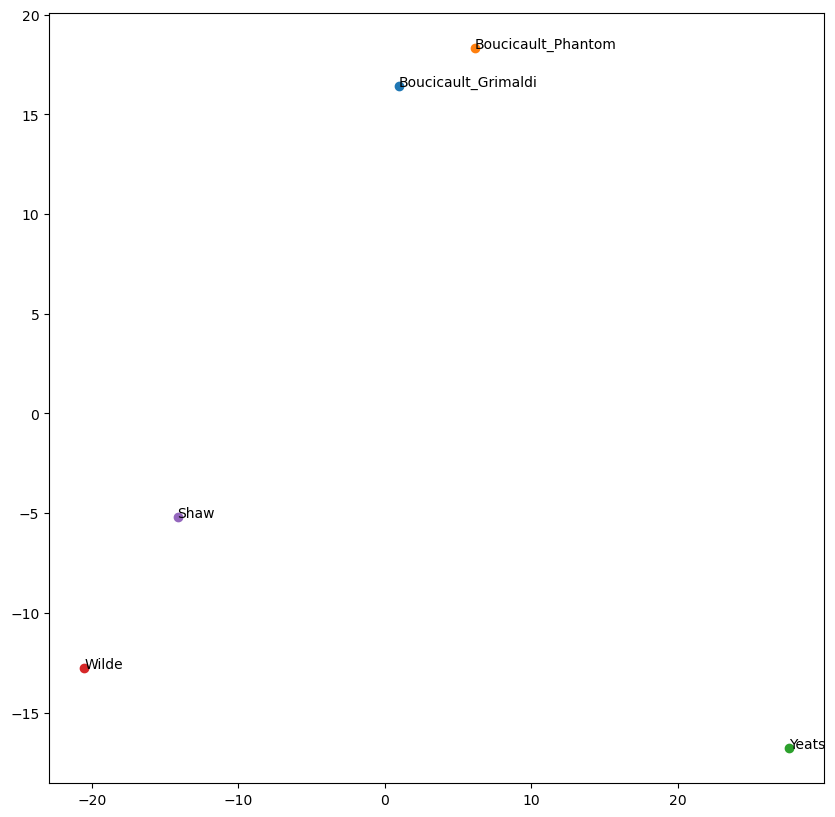

In [43]:
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(['Boucicault_Grimaldi','Boucicault_Phantom', 'Yeats', 'Wilde', 'Shaw'][i], (xs[i], ys[i]))

<a id='ner'></a>
# Named Entity Recognition With SpaCy

SpaCy is a natural language processing library, similar to the NLTK in some respects, but with many notable differences. 
 - Where the NLTK is meant for teaching and learning natural language processing, SpaCy is designed for industrial applications (i.e. designed for speed and accuracy, not necessarily ease-of-use). 
 - Instead of performing each function separately (`word_tokenize`, `pos_tag`, `lemmatize`), SpaCy does everything all at once. This has advantages and disadvantages. For example, processing with SpaCy takes a long time. But once a text is processed, no further processing is necessary—it just becomes a matter of accessing the data that's already there. 
 - Because SpaCy stores a *lot* of data about each text, this can easily lead to memory overflow errors. An easy way around this is to break the text up into individual parts, and to use functions wherever possible, to limit the amount of data stored in memory. It helps if you have a computer with a lot of RAM. You can also randomly sample chunks of text (like 1000-word chunks) at a time, and then take the average of all your random trials at the end. 
 - While the NLTK's natural language processing is deterministic (built on human understanding of how language works), it's not quite as accurate as SpaCy's probabilistic (built on machine understanding of language) approach. 
 
At the moment, SpaCy is the fastest, and almost the most accurate parser available. 

First, load your language model, and store it as the variable `nlp`, which can then be run as a function: 
   

In [44]:
import spacy
spacy.cli.download('en_core_web_sm')
nlp = spacy.load('en_core_web_sm')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.7 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Now let's get a text to play around with.

Process it using SpaCy: 

In [45]:
doc = nlp(wilde)

### Exploring our SpaCy Doc

Now we can start to explore what we can do with the resulting Doc object: 

In [46]:
type(doc)

spacy.tokens.doc.Doc

Here are some things that we can do with this object: 

In [47]:
[method for method in dir(doc) if not method.startswith('_')]

['cats',
 'char_span',
 'copy',
 'count_by',
 'doc',
 'ents',
 'extend_tensor',
 'from_array',
 'from_bytes',
 'from_dict',
 'from_disk',
 'from_docs',
 'from_json',
 'get_extension',
 'get_lca_matrix',
 'has_annotation',
 'has_extension',
 'has_unknown_spaces',
 'has_vector',
 'is_nered',
 'is_parsed',
 'is_sentenced',
 'is_tagged',
 'lang',
 'lang_',
 'mem',
 'noun_chunks',
 'noun_chunks_iterator',
 'remove_extension',
 'retokenize',
 'sentiment',
 'sents',
 'set_ents',
 'set_extension',
 'similarity',
 'spans',
 'tensor',
 'text',
 'text_with_ws',
 'to_array',
 'to_bytes',
 'to_dict',
 'to_disk',
 'to_json',
 'to_utf8_array',
 'user_data',
 'user_hooks',
 'user_span_hooks',
 'user_token_hooks',
 'vector',
 'vector_norm',
 'vocab']

We can also get the length (in tokens) of the text: 

In [48]:
len(doc)

24782

SpaCy allows us to iterate over the text's words, as if the Doc were a list of tokens: 

In [49]:
for word in doc[40:50]:
    print(word)

Lane
is
arranging
afternoon
tea
on
the
table
,
and


We can get a single word, too, so that we can do things with that individual word (token): 

In [50]:
arranging = doc[42]
arranging

arranging

### Exploring SpaCy Words

SpaCy words are *objects*, rather than strings, and so they contain a lot of information that can be accessed via their many methods. Here are a few things you can do with them: 

In [51]:
[method for method in dir(arranging) if not method.startswith('_')]

['ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'left_edge',
 'lefts',
 'lemma',
 'lemma_',
 'lex',
 'lex_id',
 'like_email',
 'like_num',
 'like_url',
 'lower',
 'lower_',
 'morph',
 'n_lefts',
 'n_rights',
 'nbor',
 'norm',
 'norm_',
 'orth',
 'orth_',
 'pos',
 'pos_',
 'prefix',
 'prefix_',
 'prob',
 'rank',
 'remove_extension',
 'right_edge',
 'rights',
 'sent',
 'sent_start',
 'sentiment',
 'set_extension',
 'set_morph',
 'shape',
 'sh

You can get the word's POS (as in the NLTK's `pos_tag()` function), like this: 

In [52]:
arranging.tag_

'VBG'

Or a less specific tag (`VERB`, `NOUN`, `PUNCT`, etc.), like this: 

In [53]:
arranging.pos_

'VERB'

(`.tag` and `.pos`, without the underscores, are numeric representations of these. You can use those if you don't care about human readability, and want your code to be a little faster.)

You can also get the lemma for the word, which is its "dictionary form": 

In [54]:
arranging.lemma_

'arrange'

With punctuation, like this comma, you can see how the `.tag` and the `.pos` properties differ: 

One caveat: the word *object* is distinct from the word's string, so to count these, or otherwise treat them as strings, we first have to extract their text: 

## Named Entity Recognition

Named entity recognition, or NER, is a subfield of natual language processing that deals with the automatic identification of people, places, things, and other related "names." This sometimes includes numbers, dates, and other things. You can tell whether a word is a named entity, and if so, what type of entity it is, like this: 

In [55]:
arranging.ent_type_

''

Explore the types of entities in a subset of words of our text: 

In [56]:
for word in doc[50:250]: 
    if len(word.text.strip()) > 0 and len(word.ent_type_) > 0: 
        print(word.text.strip(), ':', word.ent_type_)

Algernon : PERSON
Lane : PERSON
Lane : PERSON
Algernon : PERSON
Lane : PERSON
Algernon : PERSON
Lady : PERSON
Bracknell : PERSON
Lane : PERSON
two : CARDINAL
Lane : PERSON
Thursday : DATE
night : TIME
Lord : PERSON
Shoreman : PERSON
Worthing : PERSON
eight : CARDINAL
Lane : PERSON
eight : CARDINAL


We can extract places like this: 

In [57]:
for word in doc[:2000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'GPE': 
            print(word)

Shropshire
Shropshire
Cecily
Tunbridge
Wells


And times like this: 

In [58]:
for word in doc[:4000]: 
    if len(word.ent_type_) > 0: 
        if word.ent_type_ == 'TIME': 
            print(word)

afternoon
night
five
o'clock
tonight
tonight
ten
minutes
afternoon


Alternatively, we can write this as a list comprehension: 

In [59]:
times = [word.text for word in doc if word.ent_type_ == 'TIME']

In [60]:
type(times)

list

We can count our list of times, put this into a Pandas Series, and plot them, to try to show what kinds of times occur most often in a narrative: 

<Axes: >

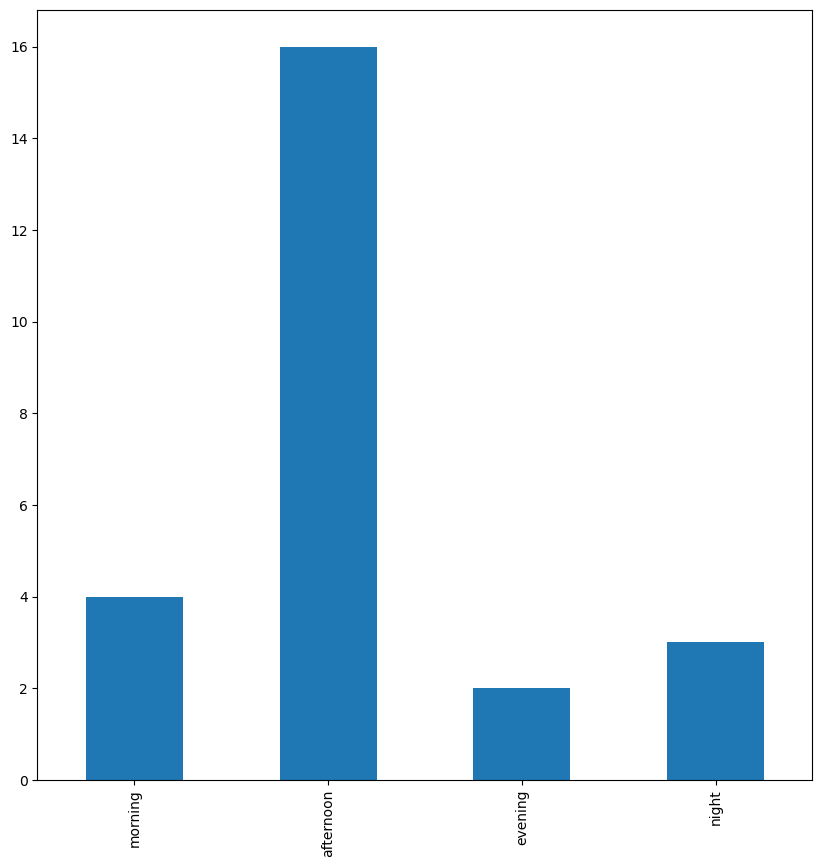

In [ ]:
from collections import Counter

pd.Series(Counter(times))[['morning', 'afternoon',
                           'evening', 'night']].plot(kind='bar')

And we can also see how frequently times and dates occur in narrative time. 

<Axes: >

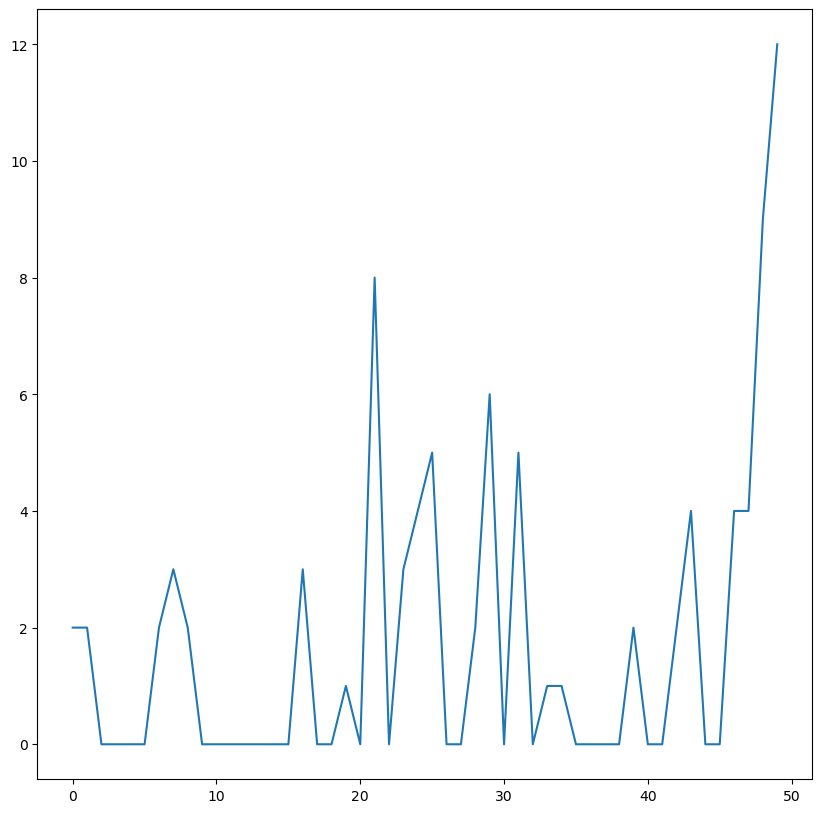

In [62]:
times = pd.Series(np.histogram([word.i for word in doc if word.ent_type_ == 'TIME'], bins=50)[0])
times.plot()